In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
from matplotlib import pyplot as plt
from scattermap import scattermap

In [2]:
df_1 = pd.read_csv('./results/out/pvalues.txt', sep='\t', index_col='interacting_pair')
df_1.head()

,id_cp_interaction,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,...,CA_subclst_5|CA_subclst_4,CA_subclst_5|CA_subclst_5,CA_subclst_5|CA_subclst_6,CA_subclst_6|CA_subclst_0,CA_subclst_6|CA_subclst_1,CA_subclst_6|CA_subclst_2,CA_subclst_6|CA_subclst_3,CA_subclst_6|CA_subclst_4,CA_subclst_6|CA_subclst_5,CA_subclst_6|CA_subclst_6
interacting_pair,,,,,,,,,,,,,,,,,,,,,
KLRG2_WNT11,CPI-SS0A7B487D4,simple:A4D1S0,simple:O96014,ENSG00000188883,ENSG00000085741,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KLRG2_TNFSF9,CPI-SS0FEC87269,simple:A4D1S0,simple:P41273,ENSG00000188883,ENSG00000125657,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PVR_TNFSF9,CPI-SS00A8596B5,simple:P15151,simple:P41273,ENSG00000073008,ENSG00000125657,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KLRG2_WNT5B,CPI-SS044DF8749,simple:A4D1S0,simple:Q9H1J7,ENSG00000188883,ENSG00000111186,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GALR2_GAL,CPI-SS0F8ABC300,simple:O43603,simple:P22466,ENSG00000182687,ENSG00000069482,True,True,False,guidetopharmacology.org,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
df_1.columns.tolist()

['id_cp_interaction',
 'partner_a',
 'partner_b',
 'gene_a',
 'gene_b',
 'secreted',
 'receptor_a',
 'receptor_b',
 'annotation_strategy',
 'is_integrin',
 'CA_subclst_0|CA_subclst_0',
 'CA_subclst_0|CA_subclst_1',
 'CA_subclst_0|CA_subclst_2',
 'CA_subclst_0|CA_subclst_3',
 'CA_subclst_0|CA_subclst_4',
 'CA_subclst_0|CA_subclst_5',
 'CA_subclst_0|CA_subclst_6',
 'CA_subclst_1|CA_subclst_0',
 'CA_subclst_1|CA_subclst_1',
 'CA_subclst_1|CA_subclst_2',
 'CA_subclst_1|CA_subclst_3',
 'CA_subclst_1|CA_subclst_4',
 'CA_subclst_1|CA_subclst_5',
 'CA_subclst_1|CA_subclst_6',
 'CA_subclst_2|CA_subclst_0',
 'CA_subclst_2|CA_subclst_1',
 'CA_subclst_2|CA_subclst_2',
 'CA_subclst_2|CA_subclst_3',
 'CA_subclst_2|CA_subclst_4',
 'CA_subclst_2|CA_subclst_5',
 'CA_subclst_2|CA_subclst_6',
 'CA_subclst_3|CA_subclst_0',
 'CA_subclst_3|CA_subclst_1',
 'CA_subclst_3|CA_subclst_2',
 'CA_subclst_3|CA_subclst_3',
 'CA_subclst_3|CA_subclst_4',
 'CA_subclst_3|CA_subclst_5',
 'CA_subclst_3|CA_subclst_6',
 'CA_

In [4]:
df_2=df_1[['secreted',  'CA_subclst_0|CA_subclst_0', 'CA_subclst_0|CA_subclst_1',
           'CA_subclst_0|CA_subclst_2', 'CA_subclst_0|CA_subclst_3', 'CA_subclst_0|CA_subclst_4',
           'CA_subclst_0|CA_subclst_5', 'CA_subclst_0|CA_subclst_6', 'CA_subclst_1|CA_subclst_1',
           'CA_subclst_1|CA_subclst_2', 'CA_subclst_1|CA_subclst_3', 'CA_subclst_1|CA_subclst_4',
           'CA_subclst_1|CA_subclst_5', 'CA_subclst_1|CA_subclst_6', 'CA_subclst_2|CA_subclst_2',
           'CA_subclst_2|CA_subclst_3', 'CA_subclst_2|CA_subclst_4', 'CA_subclst_2|CA_subclst_5',
           'CA_subclst_2|CA_subclst_6', 'CA_subclst_3|CA_subclst_3', 'CA_subclst_3|CA_subclst_4',
           'CA_subclst_3|CA_subclst_5', 'CA_subclst_3|CA_subclst_6', 'CA_subclst_4|CA_subclst_4',
           'CA_subclst_4|CA_subclst_5', 'CA_subclst_4|CA_subclst_6', 'CA_subclst_5|CA_subclst_5',
           'CA_subclst_5|CA_subclst_6', 'CA_subclst_6|CA_subclst_6'
         ]]

df_2.head()


,secreted,CA_subclst_0|CA_subclst_0,CA_subclst_0|CA_subclst_1,CA_subclst_0|CA_subclst_2,CA_subclst_0|CA_subclst_3,CA_subclst_0|CA_subclst_4,CA_subclst_0|CA_subclst_5,CA_subclst_0|CA_subclst_6,CA_subclst_1|CA_subclst_1,CA_subclst_1|CA_subclst_2,...,CA_subclst_3|CA_subclst_3,CA_subclst_3|CA_subclst_4,CA_subclst_3|CA_subclst_5,CA_subclst_3|CA_subclst_6,CA_subclst_4|CA_subclst_4,CA_subclst_4|CA_subclst_5,CA_subclst_4|CA_subclst_6,CA_subclst_5|CA_subclst_5,CA_subclst_5|CA_subclst_6,CA_subclst_6|CA_subclst_6
interacting_pair,,,,,,,,,,,,,,,,,,,,,
KLRG2_WNT11,True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KLRG2_TNFSF9,True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PVR_TNFSF9,True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KLRG2_WNT5B,True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GALR2_GAL,True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
df_3 = df_2[(df_2['secreted']==True) & 
            ((df_2['CA_subclst_0|CA_subclst_0']<0.001)|  (df_2['CA_subclst_0|CA_subclst_1']<0.001)|
             (df_2['CA_subclst_0|CA_subclst_2']<0.001)|  (df_2['CA_subclst_0|CA_subclst_3']<0.001)|
             (df_2['CA_subclst_0|CA_subclst_4']<0.001)|  (df_2['CA_subclst_0|CA_subclst_5']<0.001)|
             (df_2['CA_subclst_0|CA_subclst_6']<0.001)|  (df_2['CA_subclst_1|CA_subclst_1']<0.001)|
             (df_2['CA_subclst_1|CA_subclst_2']<0.001)|  (df_2['CA_subclst_1|CA_subclst_3']<0.001)|
             (df_2['CA_subclst_1|CA_subclst_4']<0.001)|  (df_2['CA_subclst_1|CA_subclst_5']<0.001)|
             (df_2['CA_subclst_1|CA_subclst_6']<0.001)|  (df_2['CA_subclst_2|CA_subclst_2']<0.001)|
             (df_2['CA_subclst_2|CA_subclst_3']<0.001)|  (df_2['CA_subclst_2|CA_subclst_4']<0.001)|
             (df_2['CA_subclst_2|CA_subclst_5']<0.001)|  (df_2['CA_subclst_2|CA_subclst_6']<0.001)|
             (df_2['CA_subclst_3|CA_subclst_3']<0.001)|  (df_2['CA_subclst_3|CA_subclst_4']<0.001)|
             (df_2['CA_subclst_3|CA_subclst_5']<0.001)|  (df_2['CA_subclst_3|CA_subclst_6']<0.001)|
             (df_2['CA_subclst_4|CA_subclst_4']<0.001)|  (df_2['CA_subclst_4|CA_subclst_5']<0.001)|
             (df_2['CA_subclst_4|CA_subclst_6']<0.001)|  (df_2['CA_subclst_5|CA_subclst_5']<0.001)|
             (df_2['CA_subclst_5|CA_subclst_6']<0.001)|  (df_2['CA_subclst_6|CA_subclst_6']<0.001)
            )]
df_3.head()     

,secreted,CA_subclst_0|CA_subclst_0,CA_subclst_0|CA_subclst_1,CA_subclst_0|CA_subclst_2,CA_subclst_0|CA_subclst_3,CA_subclst_0|CA_subclst_4,CA_subclst_0|CA_subclst_5,CA_subclst_0|CA_subclst_6,CA_subclst_1|CA_subclst_1,CA_subclst_1|CA_subclst_2,...,CA_subclst_3|CA_subclst_3,CA_subclst_3|CA_subclst_4,CA_subclst_3|CA_subclst_5,CA_subclst_3|CA_subclst_6,CA_subclst_4|CA_subclst_4,CA_subclst_4|CA_subclst_5,CA_subclst_4|CA_subclst_6,CA_subclst_5|CA_subclst_5,CA_subclst_5|CA_subclst_6,CA_subclst_6|CA_subclst_6
interacting_pair,,,,,,,,,,,,,,,,,,,,,
COL4A4_a2b1 complex,True,1.000,1.0,1.000,1.0,1.000,1.000,0.297,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.988,1.0,0.504,0.955
COL4A3_a2b1 complex,True,1.000,1.0,1.000,1.0,1.000,1.000,0.583,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.0,0.340,0.988
COL21A1_a2b1 complex,True,1.000,1.0,1.000,1.0,1.000,1.000,1.000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.000,1.0,1.000,1.000
FN1_a3b1 complex,True,0.969,0.0,0.000,1.0,0.987,1.000,0.976,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.0,1.000,0.510
FN1_aVb1 complex,True,0.142,1.0,0.436,1.0,0.000,0.877,0.973,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.0,1.000,0.303


In [6]:
df_3.columns.tolist()

['secreted',
 'CA_subclst_0|CA_subclst_0',
 'CA_subclst_0|CA_subclst_1',
 'CA_subclst_0|CA_subclst_2',
 'CA_subclst_0|CA_subclst_3',
 'CA_subclst_0|CA_subclst_4',
 'CA_subclst_0|CA_subclst_5',
 'CA_subclst_0|CA_subclst_6',
 'CA_subclst_1|CA_subclst_1',
 'CA_subclst_1|CA_subclst_2',
 'CA_subclst_1|CA_subclst_3',
 'CA_subclst_1|CA_subclst_4',
 'CA_subclst_1|CA_subclst_5',
 'CA_subclst_1|CA_subclst_6',
 'CA_subclst_2|CA_subclst_2',
 'CA_subclst_2|CA_subclst_3',
 'CA_subclst_2|CA_subclst_4',
 'CA_subclst_2|CA_subclst_5',
 'CA_subclst_2|CA_subclst_6',
 'CA_subclst_3|CA_subclst_3',
 'CA_subclst_3|CA_subclst_4',
 'CA_subclst_3|CA_subclst_5',
 'CA_subclst_3|CA_subclst_6',
 'CA_subclst_4|CA_subclst_4',
 'CA_subclst_4|CA_subclst_5',
 'CA_subclst_4|CA_subclst_6',
 'CA_subclst_5|CA_subclst_5',
 'CA_subclst_5|CA_subclst_6',
 'CA_subclst_6|CA_subclst_6']

In [7]:
df_4 = df_3[[ 'CA_subclst_0|CA_subclst_0',
 'CA_subclst_0|CA_subclst_1',
 'CA_subclst_0|CA_subclst_2',
 'CA_subclst_0|CA_subclst_3',
 'CA_subclst_0|CA_subclst_4',
 'CA_subclst_0|CA_subclst_5',
 'CA_subclst_0|CA_subclst_6',
 'CA_subclst_1|CA_subclst_1',
 'CA_subclst_1|CA_subclst_2',
 'CA_subclst_1|CA_subclst_3',
 'CA_subclst_1|CA_subclst_4',
 'CA_subclst_1|CA_subclst_5',
 'CA_subclst_1|CA_subclst_6',
 'CA_subclst_2|CA_subclst_2',
 'CA_subclst_2|CA_subclst_3',
 'CA_subclst_2|CA_subclst_4',
 'CA_subclst_2|CA_subclst_5',
 'CA_subclst_2|CA_subclst_6',
 'CA_subclst_3|CA_subclst_3',
 'CA_subclst_3|CA_subclst_4',
 'CA_subclst_3|CA_subclst_5',
 'CA_subclst_3|CA_subclst_6',
 'CA_subclst_4|CA_subclst_4',
 'CA_subclst_4|CA_subclst_5',
 'CA_subclst_4|CA_subclst_6',
 'CA_subclst_5|CA_subclst_5',
 'CA_subclst_5|CA_subclst_6',
 'CA_subclst_6|CA_subclst_6']]
df_4

,CA_subclst_0|CA_subclst_0,CA_subclst_0|CA_subclst_1,CA_subclst_0|CA_subclst_2,CA_subclst_0|CA_subclst_3,CA_subclst_0|CA_subclst_4,CA_subclst_0|CA_subclst_5,CA_subclst_0|CA_subclst_6,CA_subclst_1|CA_subclst_1,CA_subclst_1|CA_subclst_2,CA_subclst_1|CA_subclst_3,...,CA_subclst_3|CA_subclst_3,CA_subclst_3|CA_subclst_4,CA_subclst_3|CA_subclst_5,CA_subclst_3|CA_subclst_6,CA_subclst_4|CA_subclst_4,CA_subclst_4|CA_subclst_5,CA_subclst_4|CA_subclst_6,CA_subclst_5|CA_subclst_5,CA_subclst_5|CA_subclst_6,CA_subclst_6|CA_subclst_6
interacting_pair,,,,,,,,,,,,,,,,,,,,,
COL4A4_a2b1 complex,1.000,1.000,1.000,1.0,1.000,1.000,0.297,1.000,1.000,1.00,...,1.0,1.0,1.0,1.0,1.000,1.000,0.988,1.000,0.504,0.955
COL4A3_a2b1 complex,1.000,1.000,1.000,1.0,1.000,1.000,0.583,1.000,1.000,1.00,...,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,0.340,0.988
COL21A1_a2b1 complex,1.000,1.000,1.000,1.0,1.000,1.000,1.000,1.000,1.000,1.00,...,1.0,1.0,1.0,1.0,1.000,1.000,0.000,1.000,1.000,1.000
FN1_a3b1 complex,0.969,0.000,0.000,1.0,0.987,1.000,0.976,1.000,1.000,1.00,...,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,1.000,0.510
FN1_aVb1 complex,0.142,1.000,0.436,1.0,0.000,0.877,0.973,1.000,1.000,1.00,...,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,1.000,0.303
LGALS9_CD44,0.000,0.000,0.000,1.0,1.000,0.000,0.705,1.000,1.000,1.00,...,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,1.000,0.803
CD44_FGFR2,1.000,1.000,1.000,1.0,1.000,0.000,1.000,1.000,1.000,1.00,...,1.0,1.0,1.0,1.0,1.000,1.000,1.000,0.000,1.000,1.000
TIMP1_FGFR2,1.000,1.000,1.000,1.0,1.000,0.000,1.000,1.000,1.000,1.00,...,1.0,1.0,1.0,1.0,1.000,1.000,1.000,0.990,1.000,1.000
ROS1_FGFR2,1.000,1.000,1.000,1.0,1.000,0.000,1.000,1.000,1.000,1.00,...,1.0,1.0,1.0,1.0,1.000,1.000,1.000,0.000,1.000,1.000


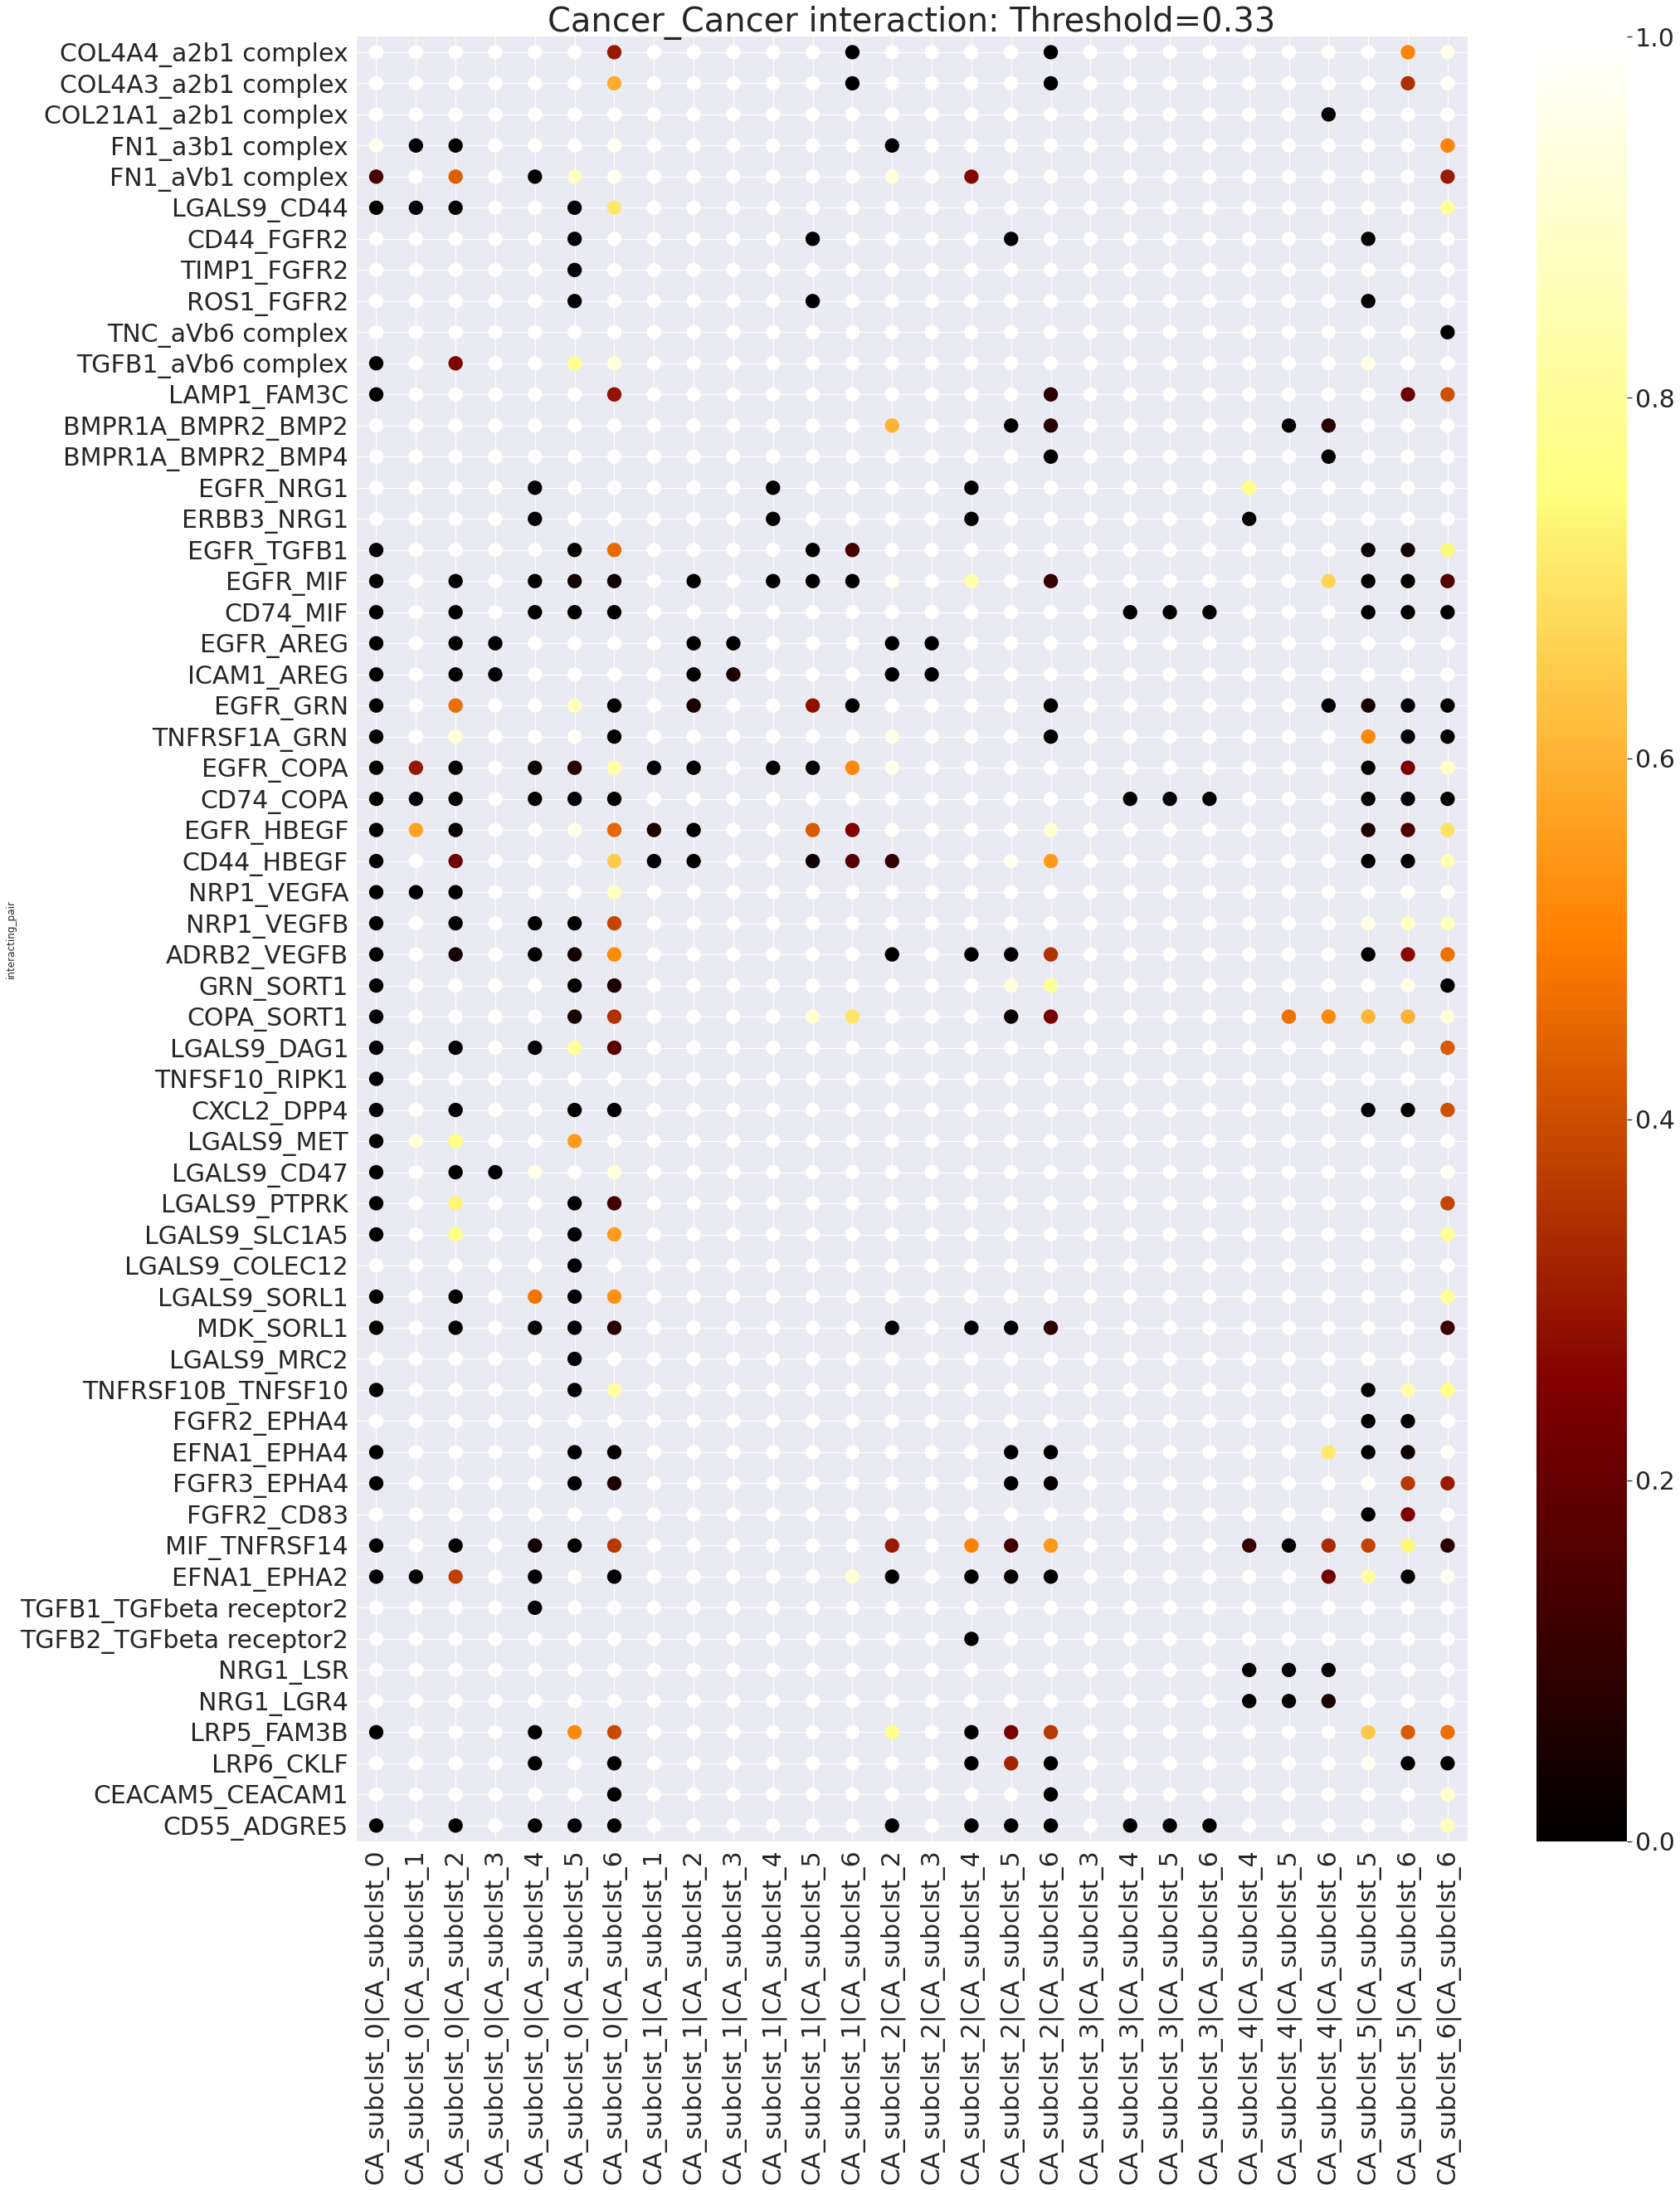

In [22]:
fig, ax = plt.subplots(figsize=(30, 40))

plt.title("Cancer_Cancer interaction: Threshold=0.33", size=40)
plt.rc('xtick', labelsize=30) # fontsize of the tick labels 
plt.rc('ytick', labelsize=30) # fontsize of the tick labels 
plt.rc('legend', fontsize=40)

ax=scattermap(df_4, marker_size=300, vmin=0, vmax=1, cmap='afmhot') #cmap=plt.cm.RdYlGn
plt.savefig("CA_CA.jpeg",dpi=600)

In [ ]:
scattermap?